Opera House / Capitol, two-class image dataset  
Each image is resized into 299x299x3 for Inception-V3 model.

In [1]:
# !pip install tqdm

In [7]:
from PIL import Image
from io import BytesIO
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import requests

In [2]:
def get_image(url):
    response = requests.get(url)
    if response.headers['content-length']=='2051': # Flickr not found
        raise Exception('Not found')
    
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize((299, 299))
    
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    return x

def get_100images(imagenet_url):
    urls = requests.get(imagenet_url).content.split('\r\n')

    imgs = np.empty((0, 299, 299, 3), np.float32)
    for i, url in tqdm(enumerate(urls)):
        try:
            img = get_image(url)
            imgs = np.append(imgs, img, axis=0)
        except:
            pass
        if imgs.shape[0]>=100:
            break
    return imgs

In [ ]:
# Opera House
url_opera = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03849814'
img_opera = get_100images(url_opera)

In [ ]:
# Capitol
url_capitol = 'http://image-net.org/api/text/imagenet.synset.geturls?wnid=n02956699'
img_capitol = get_100images(url_capitol)

In [5]:
# Concat 2 image lists
imgs = np.empty((0, 299, 299, 3), np.float32)
imgs = np.append(imgs, img_opera, axis=0)
imgs = np.append(imgs, img_capitol, axis=0)
imgs.shape

(200, 299, 299, 3)

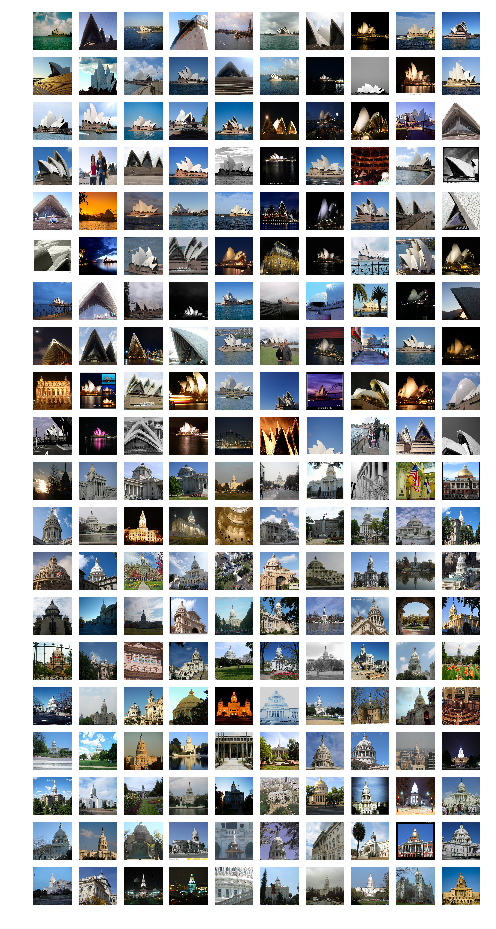

In [8]:
ncols = 10
nrows = 20
fig, axes = plt.subplots(figsize=(8, 16), ncols=ncols, nrows=nrows)
for i, im in enumerate(imgs):
    axes[i//ncols][i%ncols].imshow(im.astype(np.uint8))
    axes[i//ncols][i%ncols].axis('off')

In [9]:
labels = np.empty(0, int)
labels = np.append(labels, np.zeros(100), axis=0)
labels = np.append(labels, np.ones(100), axis=0)

In [10]:
np.savez_compressed('tl_opera_capitol.npz', features=imgs, labels=labels)